Codigo do tcc

In [1]:
!pip3 install transformers
!pip3 install dl-translate
!pip3 install emoji
!pip3 install tensorflow
!pip3 install numpy
!pip3 install tensorflow_hub

In [73]:
import tensorflow as tf
import numpy as np
import pandas as pd
import dl_translate as dlt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [3]:
mt = dlt.TranslationModel()

In [15]:
def translater_frases(frase):
  text_hi = frase
  translater = mt.translate(text_hi, source=dlt.lang.PORTUGUESE, target=dlt.lang.ENGLISH)
  return translater

def classification_frasesR(frase):
  input = tokenizerR.encode(frase, return_tensors="tf")
  output = modelR.predict(input)[0]
  prediction = tf.nn.softmax(output, axis=1).numpy()
  sentiment = np.argmax(prediction) 

  return sentiment

def classification_frasesM(frase):
  inputs = tokenizerM(frase, return_tensors="tf")
  outputs = modelM(inputs)
  logits = outputs.logits
  sentiment = tf.argmax(logits, axis=1).numpy()[0]

  return sentiment

def classification_frasesC(frase):
  sentiment = sentiment_task(frase)

  sentiment = sentiment[0]['label']

  sentiment = sentiment.replace('positive', '1').replace('negative', '-1').replace('neutral', '0')

  return sentiment


## Modelo de classificação de Tweets, treinado com 23 milhões de exemplos em inglês, sobre covid.

In [4]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
  
tokenizerR = AutoTokenizer.from_pretrained("rabindralamsal/BERTsent")

modelR = TFAutoModelForSequenceClassification.from_pretrained("rabindralamsal/BERTsent")


2023-09-12 20:00:31.066405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-12 20:00:31.067135: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at rabindralamsal/BERTsent.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions 

In [5]:
example_tweet = "The NEET exams show our Govt in a poor light: unresponsiveness to genuine concerns; admit cards not delivered to aspirants in time; failure to provide centres in towns they reside, thus requiring unnecessary & risky travels. What a disgrace to treat our #Covid warriors like this!"
    
input = tokenizerR.encode(example_tweet, return_tensors="tf")
output = modelR.predict(input)[0]
prediction = tf.nn.softmax(output, axis=1).numpy()

sentiment = np.argmax(prediction)
    
print(prediction)
print(sentiment)

1/1 [==============================] - 6s 6s/step
[[0.97267216 0.02368475 0.00364307]]
0


## Este é um modelo multilíngue baseado em XLM-roBERTa treinado em aproximadamente 198 milhões de tweets e ajustado para análise de sentimento. O ajuste fino do sentimento foi feito em 8 idiomas (Ar, En, Fr, De, Hi, It, Sp, Pt).

In [6]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("que dia pessimo")


[{'label': 'negative', 'score': 0.9488404989242554}]

In [7]:
tweetSent = pd.read_csv("./datasetcompolaridade.csv")

In [10]:
tweetSent

,Unnamed: 0,tweets_original,tweets_translater_unicamp,tweets_translater_face,polaridade
0,0,Que coisa linda! O Programa #encontro estava m...,The #encontro Program was showing a family tha...,What a beautiful thing! The #touch program was...,1.0
1,1,"Por mais #Encontro com as Irmãs Galvão, adorei...",I loved them.,"For more I met with the Galvan Sisters, I love...",1.0
2,2,Mr. CATRA lançando sua nova música PPK CHORA ...,CATRA launching its new song PPK CHORA no k,Mr. CATRA releases his new song PPK CHORA on k...,1.0
3,3,quem viu aquela lutadora modela barbuda tatuad...,#MasterChefBR,Who saw that fighter model tattooed? #MasterCh...,0.0
4,4,Tô passada com esse cara.... quanta merda pode...,"I'm handled with this guy.... how mu""",How much shit can come out of someone’s mouth ...,-1.0
...,...,...,...,...,...
11523,11522,a animação da filha da vanessa da mata é de se...,The animation of the daughter of vanessa da ma...,The animation of the daughter of the vanessa o...,1.0
11524,11523,eu ja to aqui pronto pro #MasterChefBR mas ain...,"I'm already here ready for #MasterChefBR but""",I'm ready to go here for #MasterChefBR but I'm...,-1.0
11525,11524,MALUCO! Uma coisa que eu não tenho coragem é e...,"One thing I don't have the courage is this""",One thing I don’t have the courage is that nor...,-1.0
11526,11525,#MaisVoce está linda,#By You are beautiful #ByYou are beauti,#MaisVoce is beautiful,1.0


In [11]:
tweetSent.drop(columns = ['tweets_translater_unicamp'],inplace=True)

/home/lincoln81/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
tweetSent['polaridadeMultiClassifierTweetsOriginal'] = tweetSent['tweets_original'].apply(classification_frasesC)

/tmp/ipykernel_1142/3519791034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSent['polaridadeMultiClassifierTweetsOriginal'] = tweetSent['tweets_original'].apply(classification_frasesC)


In [18]:
tweetSent['polaridadeMultiClassifierTweetsTraduzido'] = tweetSent['tweets_translater_face'].apply(classification_frasesC)

/tmp/ipykernel_1142/2918642435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSent['polaridadeMultiClassifierTweetsTraduzido'] = tweetSent['tweets_translater_face'].apply(classification_frasesC)


In [20]:
tweetSent['polaridadeMultiClassifierTweetsOriginal'] = tweetSent['polaridadeMultiClassifierTweetsOriginal'].astype(float)


/tmp/ipykernel_1142/699218224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSent['polaridadeMultiClassifierTweetsOriginal'] = tweetSent['polaridadeMultiClassifierTweetsOriginal'].astype(float)


In [24]:
tweetSent['polaridadeMultiClassifierTweetsTraduzido'] = tweetSent['polaridadeMultiClassifierTweetsTraduzido'].astype(float)

/tmp/ipykernel_1142/1572130815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetSent['polaridadeMultiClassifierTweetsTraduzido'] = tweetSent['polaridadeMultiClassifierTweetsTraduzido'].astype(float)


In [49]:
results = {
  'Dataset': ['TweetSentBr'],
  'Original': [pd.DataFrame({'F1': [f1_score(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsOriginal'], average='macro')], 'Precision': [precision_score(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsOriginal'], average='macro')], 'Recall': [recall_score(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsOriginal'], average='macro')]})],
  'Traduzido': [pd.DataFrame({'F1': [f1_score(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsTraduzido'], average='macro')], 'Precision': [precision_score(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsTraduzido'], average='macro')], 'Recall': [recall_score(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsTraduzido'], average='macro')]})]
}

In [186]:
tweetSent.to_csv('tweetSentClassifier.csv')

In [67]:
results['Original'][0]

,F1,Precision,Recall
0,0.579302,0.579745,0.584742


In [66]:
results['Traduzido'][0]

,F1,Precision,Recall
0,0.51337,0.517253,0.517193


In [78]:
matrizConfusaoOriginal = confusion_matrix(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsOriginal'])

In [86]:
matrizConfusaoOriginal

array([[2106,  729,  547],
       [ 798, 1501,  625],
       [ 888, 1099, 3217]])

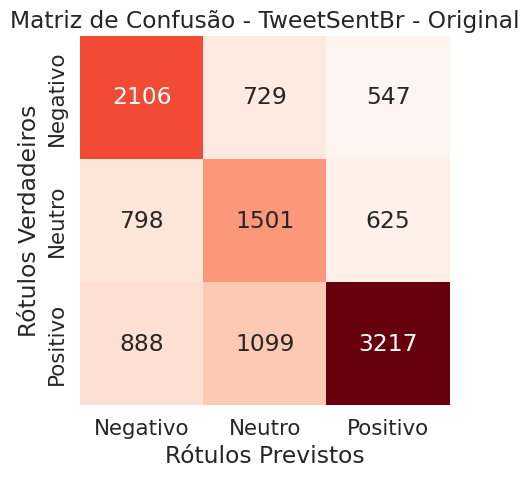

In [97]:
sns.heatmap(matrizConfusaoOriginal, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
            xticklabels=["Negativo","Neutro", "Positivo"], yticklabels=["Negativo","Neutro", "Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão - TweetSentBr - Original")

plt.show()

In [82]:
matrizConfusaoTraduzido = confusion_matrix(tweetSent['polaridade'], tweetSent['polaridadeMultiClassifierTweetsTraduzido'])


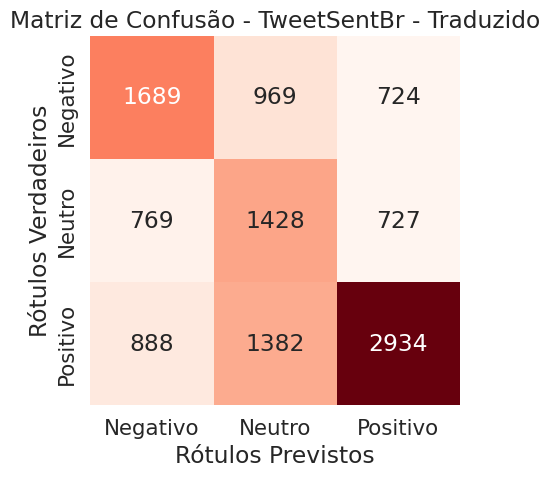

In [96]:
sns.heatmap(matrizConfusaoTraduzido, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
             xticklabels=["Negativo","Neutro", "Positivo"], yticklabels=["Negativo","Neutro", "Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão - TweetSentBr - Traduzido")

plt.show()

In [138]:
b2wDataset = pd.read_csv("./b2w.csv")

In [139]:
b2wDataset.drop(columns = ['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], inplace=True)

In [154]:
b2wDataset.dropna(inplace=True)

In [155]:
b2w = b2wDataset[b2wDataset['polarity'] == 1].head(100)

In [156]:
b2w = b2w.append(b2wDataset[b2wDataset['polarity'] == 0].head(100))

In [160]:
b2w['review_translater_face'] = b2w['review_text'].apply(translater_frases)

In [161]:
b2w['polaridadeMultiClassifierTweetsOriginal'] = b2w['review_text'].apply(classification_frasesC)

In [162]:
b2w['polaridadeMultiClassifierTweetsTraduzido'] = b2w['review_translater_face'].apply(classification_frasesC)

In [164]:
b2w['polaridadeMultiClassifierTweetsOriginal'] = b2w['polaridadeMultiClassifierTweetsOriginal'].astype(float)
b2w['polaridadeMultiClassifierTweetsTraduzido'] = b2w['polaridadeMultiClassifierTweetsTraduzido'].astype(float)

In [184]:
b2w.to_csv('b2wExample.csv', index=False)

In [172]:
resultss = {
  'Dataset': ['B2W'],
  'Original': [pd.DataFrame({'F1': [f1_score(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsOriginal'], average='weighted')], 'Precision': [precision_score(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsOriginal'], average='weighted')], 'Recall': [recall_score(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsOriginal'], average='weighted')]})],
  'Traduzido': [pd.DataFrame({'F1': [f1_score(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsTraduzido'], average='weighted')], 'Precision': [precision_score(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsTraduzido'], average='weighted')], 'Recall': [recall_score(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsTraduzido'], average='weighted')]})]
}


/home/lincoln81/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lincoln81/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
resultss['Original'][0]

,F1,Precision,Recall
0,0.605613,0.816667,0.52


In [174]:
resultss['Traduzido'][0]

,F1,Precision,Recall
0,0.637582,0.894048,0.55


Text(0.5, 1.0, 'Matriz de Confusão - B2w - Traduzido')

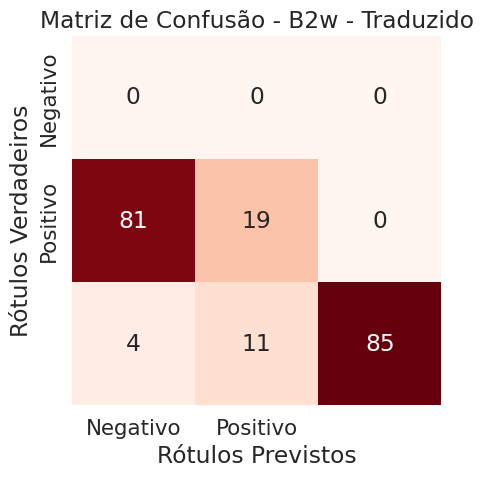

In [177]:
matrizConfusaoB2wOriginal = confusion_matrix(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsOriginal'])

sns.heatmap(matrizConfusaoB2wOriginal, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
             xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão - B2w - Traduzido")


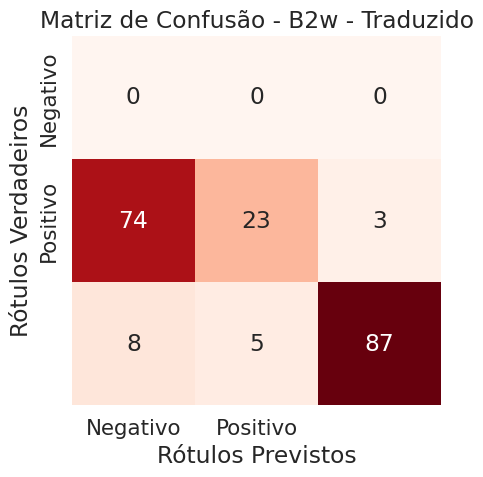

In [179]:
matrizConfusaoB2wTraduzido = confusion_matrix(b2w['polarity'], b2w['polaridadeMultiClassifierTweetsTraduzido'])

sns.heatmap(matrizConfusaoB2wTraduzido, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
              xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Matriz de Confusão - B2w - Traduzido")

plt.show()